## Observations and Insights

## Dependencies and starter code

In [151]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
df = mouse_metadata.merge(study_results, how = "outer", on = "Mouse ID")

In [152]:
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [153]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen

In [154]:
data_points = df["Tumor Volume (mm3)"]
tumor_mean = df["Tumor Volume (mm3)"].mean()
tumor_median = df["Tumor Volume (mm3)"].median()
tumor_variance = df["Tumor Volume (mm3)"].var()
tumor_standard_deviation = df["Tumor Volume (mm3)"].std()
tumor_standard_error = df["Tumor Volume (mm3)"].sem()

pd.DataFrame({"Mean Tumor Volume":[tumor_mean],"Median Tumor Volume":tumor_median,"Variance Tumor Volume":tumor_variance,"Standard Deviation Tumor Volume":tumor_standard_deviation,"Standard Error Tumor Volume":tumor_standard_error})

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,Standard Error Tumor Volume
0,50.448381,48.951474,79.116074,8.894722,0.204436


## Bar plots

In [155]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

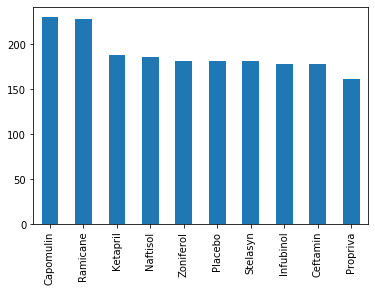

In [156]:
drug_regimen = df["Drug Regimen"].value_counts().plot(kind = "bar")

In [157]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

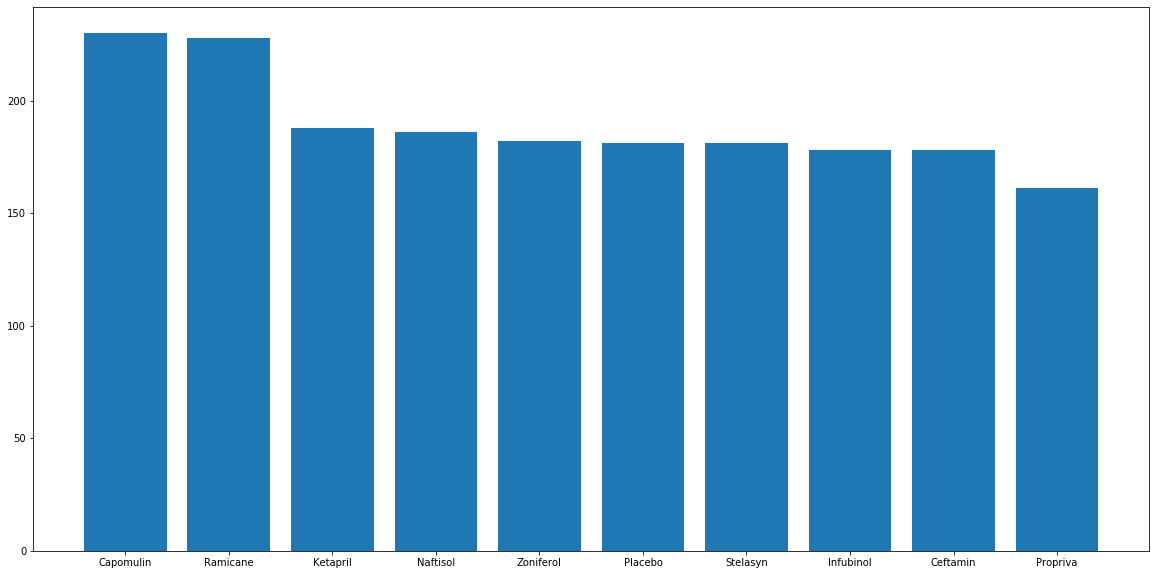

In [158]:
drug_regimen = df["Drug Regimen"].value_counts()
# drug_regimen.plot(kind = "bar")
plt.figure(figsize=(20,10))
plt.bar(drug_regimen.index.values,drug_regimen.values)
plt.show()

In [159]:
drug_regimen.head()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Name: Drug Regimen, dtype: int64

## Pie plots

In [160]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

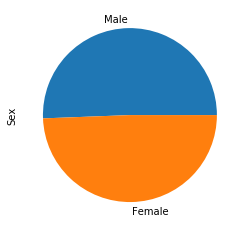

In [161]:
sex = df["Sex"].value_counts().plot(kind = "pie")

In [162]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

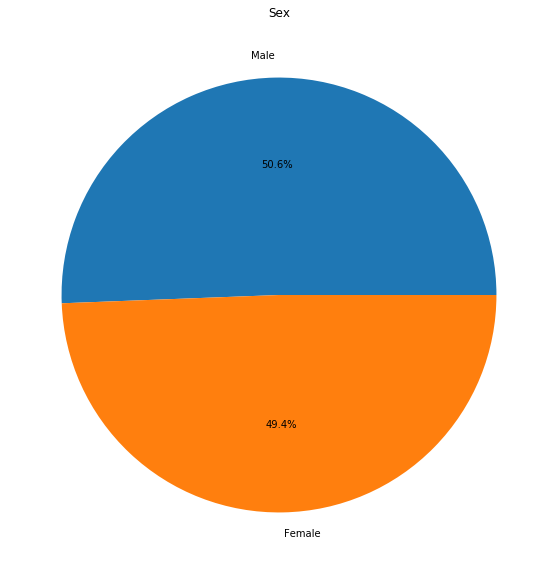

In [163]:
drug_sex = df["Sex"].value_counts()
# drug_regimen.plot(kind = "pie")
plt.figure(figsize=(20,10))
plt.pie(drug_sex.values,labels = ["Male","Female"],autopct='%1.1f%%')
plt.title('Sex')
plt.show()

## Quartiles, outliers and boxplots

In [164]:
# Calculate the final tumor volume of each
# mouse across four of the most promising treatment
# regimens. Calculate the IQR and quantitatively 
# determine if there are any potential outliers. 

In [165]:
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [166]:
mouse_group = df.groupby("Mouse ID")
max_timepoint = mouse_group["Timepoint"].max()
df2 = max_timepoint.to_frame().reset_index()

In [167]:
max_vol_df = df.merge(df2, how = "inner", on = ("Mouse ID","Timepoint"))
max_vol_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [168]:
# Capomulin, Ramicane, Infubinol, and Ceftamin

In [169]:
cap_vol = max_vol_df.loc[max_vol_df["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
ram_vol = max_vol_df.loc[max_vol_df["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"]
inf_vol = max_vol_df.loc[max_vol_df["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"]
cer_vol = max_vol_df.loc[max_vol_df["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]

In [170]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = cap_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The interquartile range of tumor volume for Capomulin is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The interquartile range of tumor volume for Capomulin is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [171]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = ram_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The interquartile range of tumor volume for Ramicane is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The interquartile range of tumor volume for Ramicane is: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [172]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = inf_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The interquartile range of tumor volume for Infubinol is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The interquartile range of tumor volume for Infubinol is: 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [173]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = cer_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The interquartile range of tumor volume for Ceftamin is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The interquartile range of tumor volume for Ceftamin is: 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [174]:
# Generate a box plot of the final tumor volume of each mouse across 
# four regimens of interest

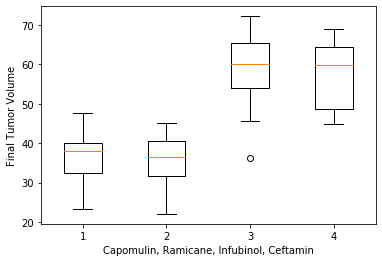

In [175]:
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume")
ax1.set_xlabel("Capomulin, Ramicane, Infubinol, Ceftamin")
plt.boxplot([cap_vol,ram_vol, inf_vol,cer_vol])
plt.show()

## Line and scatter plots

In [176]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

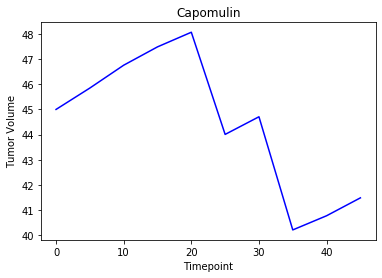

In [177]:
tumor_volume = df.loc[df["Mouse ID"]=="l509"]["Tumor Volume (mm3)"]
timepoint = df.loc[df["Mouse ID"]=="l509"]["Timepoint"]
plt.plot(timepoint, tumor_volume, color="blue")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.title("Capomulin")
plt.show()

In [178]:
# Generate a scatter plot of mouse weight versus average tumor volume 
# for the Capomulin regimen

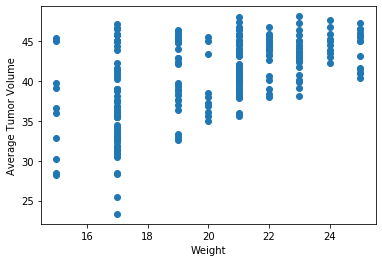

In [189]:
weight = df.loc[df["Drug Regimen"]=="Capomulin"]["Weight (g)"]
tumor = df.loc[df["Drug Regimen"]=="Capomulin"]["Tumor Volume (mm3)"]
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume")
plt.scatter(weight,tumor)
plt.show()

In [180]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume 
# for the Capomulin regimen

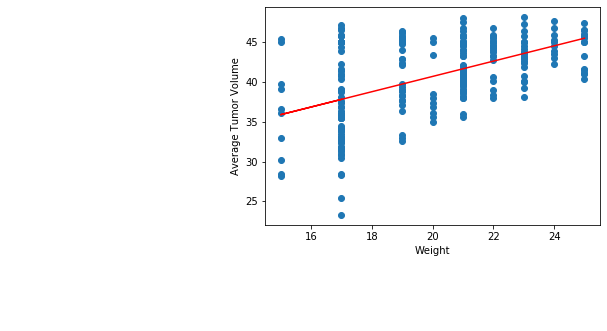

In [186]:
weight = df.loc[df["Drug Regimen"]=="Capomulin"]["Weight (g)"]
tumor = df.loc[df["Drug Regimen"]=="Capomulin"]["Tumor Volume (mm3)"]
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume")
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, tumor)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight,tumor)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()